In [5]:
# 5장 복습하기 : mpg 데이터 파악해보기
import pandas as pd
mpg = pd.read_csv('../Data/mpg.csv')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [18]:
# 고속도로 연비를 나타내는 변수(컬럼) 이름을 hwy에서 highway로 변경
# 도시 연비를 나타내는 변수(컬럼) 이름을 cty에서 city로 변경
mpg = mpg.rename(columns = {'hwy' : 'highway', 'cty' : 'city'})
mpg.head(1)

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact


In [23]:
# 도시연비와 고속도로 연비를 합한 값인 합산연비 total 파생변수(컬럼) 추가
mpg['total'] = (mpg['highway'] + mpg['city'])
mpg.head(1)

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,category,total
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,47


In [106]:
# 도시연비와 고속도로 연비를 합한 값인 합산연비 total 변수를 2로 나눈 평균연비 mean 파생변수(컬럼) 추가
mpg['mean'] = mpg['total'] / 2
mpg.head(1)

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,category,total,mean,grade
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,47,23.5,B


In [108]:
# 자동차 합산연비 total 변수(컬럼)의 요약통계량 구하기
# 요약 통계량에서 25%, 75% 값 확인하기
mpg['mean'].describe()
mpg.describe()

,displ,year,cyl,city,highway,total,mean
count,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171,40.299145,20.149573
std,1.291959,4.509646,1.611534,4.255946,5.954643,10.100580,5.050290
min,1.600000,1999.000000,4.000000,9.000000,12.000000,21.000000,10.500000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000,31.000000,15.500000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000,41.000000,20.500000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000,47.000000,23.500000
max,7.000000,2008.000000,8.000000,35.000000,44.000000,79.000000,39.500000


In [118]:
# 합산연비 total 값에 따라 
# 합산연비 total 값이 75% 값 초과이면 'A'
# 합산연비 total 값이 25% 값 이상 ~ 75% 값 미만이면 'B'
# 합산연비 total 값이 25% 값 미만이면 'C'
# 값을 갖는 'grade' 파생변수 추가
import numpy as np

mpg['grade'] = np.where(mpg['mean'] > 23.5, 'A', 
               np.where(mpg['mean'] > 15.5, 'B', 'C'))
mpg.head(2)

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,category,total,mean,grade
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,47,23.5,B
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,50,25.0,A


In [120]:
# 합산 연비 값에 따라 A, B, C 등급으로 분류된 데이터 빈도수 테이블 생성
mpg['grade'].unique()
mpg['grade'].value_counts()

grade
B    124
C     60
A     50
Name: count, dtype: int64

<Axes: xlabel='grade'>

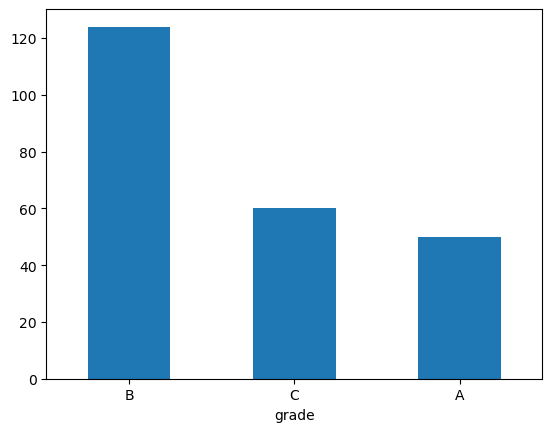

In [122]:
# 합산 연비 값에 따라 A, B, C 등급으로 분류된 데이터 개수 테이블로 막대 그래프 그리기
mpg['grade'].value_counts().plot.bar(rot = 0)

In [124]:
# A등급인 'manufacturer', 'model', 'total' 추려보기
mpg.query('grade == "A"')[['manufacturer', 'model', 'total']]\
    .query('total >= 60')[['manufacturer', 'model']]

,manufacturer,model
99,honda,civic
104,honda,civic
105,honda,civic
106,honda,civic
195,toyota,corolla
196,toyota,corolla
197,toyota,corolla
212,volkswagen,jetta
221,volkswagen,new beetle
222,volkswagen,new beetle


In [142]:
# 6장 시작!
exam = pd.read_csv('../Data/exam.csv')
exam.sort_values('science') # 오름차순 정렬 "ascending = True"가 기본 값
# exam.sort_values('science', ascending = False) # 내림차순 정렬
exam.sort_values(['nclass', "science"], ascending = [True, False]) # 오름차순 반별 내림차순 과학 점수 정렬

,id,nclass,math,english,science
2,3,1,45,86,78
1,2,1,60,97,60
3,4,1,30,98,58
0,1,1,50,98,50
5,6,2,50,89,98
4,5,2,25,80,65
6,7,2,80,90,45
7,8,2,90,78,25
10,11,3,65,65,65
9,10,3,50,98,45


In [148]:
# mpg.sort_values('total', ascending=False).head()
mpg.sort_values(['manufacturer','total'], ascending=False)

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,category,total,mean,grade
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact,79,39.5,A
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,77,38.5,A
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,70,35.0,A
210,volkswagen,gti,2.0,2008,4,auto(s6),f,22,29,p,compact,51,25.5,A
215,volkswagen,jetta,2.0,2008,4,auto(s6),f,22,29,p,compact,51,25.5,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact,41,20.5,B
11,audi,a4 quattro,2.8,1999,6,auto(l5),4,15,25,p,compact,40,20.0,B
14,audi,a4 quattro,3.1,2008,6,manual(m6),4,15,25,p,compact,40,20.0,B
15,audi,a6 quattro,2.8,1999,6,auto(l5),4,15,24,p,midsize,39,19.5,B


In [178]:
# 기존에 사용하던 방식
exam['total1'] = exam['math'] + exam['english'] + exam['science']
exam.head()
# 새로운 방식 - 기존과 다른 점은 저장이 되지않는다! 저장하고 싶으면 저장 해줘야함
# exam = exam.assign(total2 = exam['math'] + exam['english'] + exam['science'])
# exam.assign(total2 = exam['math'] + exam['english'] + exam['science'],
#             영어수학 = exam['math'] + exam['english'],
#             수학과학 = exam['math'] + exam['science'],
#             공대생 = np.where(exam['math'] + exam['science'] > 100, 
#                            '공대생', '공대생 아님')
#            ).query('공대생 == "공대생"')

# # assign에서는 내부에서 선언된 것들은 쓸 수 없음. 그래서 어떻게 쓰는지 해 볼 거임 -> lambda 이용
# exam.assign(total2 = exam['math'] + exam['english'] + exam['science'],
#             영어수학 = exam['math'] + exam['english'],
#             수학과학 = exam['math'] + exam['science'],
#             공대생 = np.where(exam['수학과학'] > 100, # 에러남
#                            '공대생', '공대생 아님')
#            ).query('공대생 == "공대생"')

exam.assign(total2 = exam['math'] + exam['english'] + exam['science'],
            영어수학 = exam['math'] + exam['english'],
            수학과학 = exam['math'] + exam['science'],
            공대생 = np.where(lambda x : x['수학과학'] > 100, # 에러남
                           '공대생', '공대생 아님')
           ).query('공대생 == "공대생"')

,id,nclass,math,english,science,total2,total1,영어수학,수학과학,공대생
0,1,1,50,98,50,198,198,148,100,공대생
1,2,1,60,97,60,217,217,157,120,공대생
2,3,1,45,86,78,209,209,131,123,공대생
3,4,1,30,98,58,186,186,128,88,공대생
4,5,2,25,80,65,170,170,105,90,공대생
5,6,2,50,89,98,237,237,139,148,공대생
6,7,2,80,90,45,215,215,170,125,공대생
7,8,2,90,78,25,193,193,168,115,공대생
8,9,3,20,98,15,133,133,118,35,공대생
9,10,3,50,98,45,193,193,148,95,공대생


In [176]:
exam.assign(total100 = exam['math'] + exam['english'] + exam['science'],
            평균 = lambda x : x['total100'] / 3)
# lambda는 시험에 들어가지는 않음

,id,nclass,math,english,science,total2,total1,total100,평균
0,1,1,50,98,50,198,198,198,66.000000
1,2,1,60,97,60,217,217,217,72.333333
2,3,1,45,86,78,209,209,209,69.666667
3,4,1,30,98,58,186,186,186,62.000000
4,5,2,25,80,65,170,170,170,56.666667
5,6,2,50,89,98,237,237,237,79.000000
6,7,2,80,90,45,215,215,215,71.666667
7,8,2,90,78,25,193,193,193,64.333333
8,9,3,20,98,15,133,133,133,44.333333
9,10,3,50,98,45,193,193,193,64.333333


In [206]:
# groupby, aggregate 사용해보기
# groupby, aggregate가 난이도가 있음. 현재 데이터가 쉬워서 그렇지 사용하려고 보면 어렵기에 예제 많이 풀어보기
exam.groupby('nclass').agg(반별과학평균값 = ('science', 'mean')) # aggregate에서는 ()생략
exam.groupby('nclass').agg(최고과학득점 = ('science', 'max'))
# 반별 영어 평균
exam.groupby('nclass').agg(반별영어평균값 = ('english', 'mean'),
                          반별수학응시자수 = ('math', 'count')) # 이렇게 합쳐도 됨
# 반별 수학 응시자 수
# exam.groupby('nclass').agg(반별수학응시자수 = ('math', 'count'))

,반별영어평균값,반별수학응시자수
nclass,,
1,94.75,4
2,84.25,4
3,86.50,4
4,84.75,4
5,74.25,4


In [262]:
# 6장 연습문제
# mpg를 읽어라
mpg = pd.read_csv('../Data/mpg.csv')
# 제일 도심에서 잘 잘리는 자동차 유형은? 카테고리는? (sup, minivan...) category
# 카테고리별로 도심연비(cty)의 평균을 구하고, 높은 순서로 정렬하라
mpg.groupby('category').agg(도심연비평균 = ('cty', 'mean'))\
    .sort_values('도심연비평균', ascending=False)\
    .head(3)

,도심연비평균
category,
subcompact,20.371429
compact,20.127660
midsize,18.756098


In [260]:
# 고속도로에서 제일 잘 달리는 브랜드는?
# 제조사별로 하이웨이 연비의 평균을 구하고 높은 순서로 정렬해라
mpg.groupby('manufacturer').agg(하이웨이연비평균 = ('hwy', 'mean'))\
    .sort_values('하이웨이연비평균', ascending=False)\
    .head()

,하이웨이연비평균
manufacturer,
honda,32.555556
volkswagen,29.222222
hyundai,26.857143
audi,26.444444
pontiac,26.400000


In [280]:
# 년도별로 자동차가 몇 개씩 출시되었는지 확인해라. 높은 순으로 정렬
mpg.groupby('year').agg(연도별출시개수 = ('year', 'count'))\
    .sort_values('연도별출시개수', ascending=False)
# 년도별로 suv 자동차가 몇개씩 출시되었는지 확인
mpg.query('category == "suv"')\
    .groupby('year').agg(연도별suv출시개수 = ('year', 'count'))

,연도별suv출시개수
year,
1999,29
2008,33


In [302]:
# 1분 만에 데이터 분석 마스터하기!
mpg.query('category == "suv"')\
   .assign(total = (mpg['hwy'] + mpg['cty'])/ 2 )\
   .groupby('manufacturer')\
   .agg(mean_tot = ('total', 'mean'))\
   .sort_values('mean_tot', ascending = False)\
   .head(5)
# suv에 해당하는 것 뽑기
# 토탈구하기(도심 + 고속도로)
# 브랜드별
# 토탈 평균구하기
# 토탈 평균 내림차순 정렬
# 5개만 보기

,mean_tot
manufacturer,
subaru,21.916667
toyota,16.312500
nissan,15.875000
mercury,15.625000
jeep,15.562500


In [292]:
# 데이터 합치기
# 가로로 함치기 merge()
# 세로로 합치기 concat()

midterm = pd.read_csv('../Data/midterm.csv')
final = pd.read_csv('../Data/final.csv')
# pd.merge(데이터프레임1, 데이터프레임2, on = 기준, how = 방식)
pd.merge(midterm, final, on = 'id', how = 'left')

,id,midterm,final
0,1,50,50
1,2,60,60
2,3,78,78
3,4,58,58
4,5,65,65
5,6,98,98
6,7,45,45
7,8,25,25
8,9,15,15
9,10,45,45


In [296]:
pd.concat([midterm, final], ignore_index=True)

,id,midterm,final
0,1,50.0,NaN
1,2,60.0,NaN
2,3,78.0,NaN
3,4,58.0,NaN
4,5,65.0,NaN
5,6,98.0,NaN
6,7,45.0,NaN
7,8,25.0,NaN
8,9,15.0,NaN
9,10,45.0,NaN


In [300]:
# 1분 만에 데이터 분석 마스터하기! -> 다음 시간까지 외워오기!!
mpg.query('category == "suv"')\
   .assign(total = (mpg['hwy'] + mpg['cty'])/ 2 )\
   .groupby('manufacturer')\
   .agg(mean_tot = ('total', 'mean'))\
   .sort_values('mean_tot', ascending = False)\
   .head(5)
# suv에 해당하는 것 뽑기
# 토탈구하기(도심 + 고속도로)
# 브랜드별
# 토탈 평균구하기
# 토탈 평균 내림차순 정렬
# 5개만 보기

,mean_tot
manufacturer,
subaru,21.916667
toyota,16.312500
nissan,15.875000
mercury,15.625000
jeep,15.562500
